In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## TEIS BDI-3 Analysis

[The Tennessee Early Intervention System (TEIS)](https://www.tn.gov/didd/for-consumers/tennessee-early-intervention-system-teis.html) is a voluntary program that offers therapy and other services to families of infants and young children with developmental delays or disabilities. Services are provided at no cost to families. TEIS is critically important to supporting the development of Tennessee children with disabilities and developmental delays as they prepare for school.

In this project, you are going to be working with data gathered from the Battelle Developmental Inventory, Third Edition (BDI-3) Eligibility Evaluation, an early childhood instrument based on the concept of developmental milestones. The BDI-3 is used by TEIS for determining eligibility and outcomes. This assessment tool has been in use for less than a year now, so the purpose of your work is to analyze the scores to see if there appear to be any weaknesses in this tool in any of the assessed domains or subdomains.

The BDI-3 is divided into 5 domains, each of which has 2 or 3 subdomains. On each domain and subdomain, a child receives several different scores. An example score report is available in the BDI3_ScoreReport.pdf file. See page 3 of this file for a detailed description of each score. Note that the BDI-3 is norm-based, meaning that the scores are generated by the child's performance based on the performance of same-aged peers on the same items. 

Some notes about the data:
* The same instrument is used for determining eligibility and outcomes. The type of evaluation can be determined from the "Program Label" column, which will indicate either an eligibility evaluation, an annual evaluation, or a birthday/milestone or exit evaluation. 
* Some of the rows are duplicated, so be sure to check that in your initial data inspection and cleaning. In addition, some children will have multiple rows in the dataset. A child is evaluated at initial eligibility, annually, and at their 3rd birthday or exit under certain circumstances. The evaluation may be repeated every 4 months (e.g. a child was ineligible and re-referred). 
* There are many records that are missing ID numbers. These records have been given a unique identifier which starts with "SP" so that they can be identified.
* When reading the data in, you may notice that some of the values in the RDI columns are incorrectly converted to dates. It is likely that this happens whenever the numerator of the fraction is 12 or less.

Project Objectives:
1. In which domains (and sub-domains) are children performing highest and lowest?

2. What is the pattern of children's scores? Do individual children tend to perform similarly across all domains or are there differences from domain to domain? Are these patterns similar for all children?

3. Is there a pattern of significant differences in children's scores in the sub-domains within a domain? For example, a gap between a child's expressive (talking) and receptive (understanding) language scores may indicate that additional evaluation is needed for that child's eligibility. A gap between these sub-domains for all or most children may indicate the BDI-3 tool may lack sensitivity in the language domain.

4. Does the child's age seem to impact their scoring?

5. Eligibility is currently based on domains. A child would be considered eligible based on a 40% delay in one area or 25% delay in two areas, as determined by Development Quotient (DQ) scores. A DQ of 70 or less indicates a 40% delay, and a DQ between 71 and 78 indicates a 25% delay. If TEIS added an option for eligibility based on the total score on the BDI-3 total score (DQ score of 70 or less), are there any children who would have qualified that did not qualify based on the current method?

6. Is there any difference in scoring noted based on evaluation type?

7. Is there any notable pattern of scoring by region? Note: TEIS contracts with three agencies for evaluations (one per grand region) as follows:  
* East TN, First TN and Southeast
* Greater Nashville, Upper Cumberland, and South Central
* Northwest, Southwest, and Memphis Delta

8. Is there any notable pattern of scoring by evaluator?

Stretch Goal:
* Investigate the records that are missing ID values. Have they gotten better or worse over time? Are there repeat offenders?
* As noted above, this evaluation may be repeated every 4 months. How often did it occur that a child was assessed multiple times in a time period of less than 120 days. Has this gotten better or worse over time?

In [3]:
dataset = pd.read_excel('../data/BDI3 All Evals for NSS 11-2023.xlsx')

In [2]:
"---------------------------------"

'---------------------------------'

1. In which domains (and sub-domains) are children performing highest and lowest?

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19500 entries, 0 to 19499
Columns: 219 entries, Child ID to Code 10
dtypes: datetime64[ns](14), float64(79), object(126)
memory usage: 32.6+ MB


In [5]:
dataset['Adaptive Sum of Scaled Scores'].mean()

11.412712255681527

In [20]:
dataset['Communication Sum of Scaled Scores'].mean()

13.201499820227028

In [18]:
dataset['Social-Emotional Sum of Scaled Scores'].mean()

22.381152799876816

In [24]:
dataset['Cognitive Sum of Scaled Scores'].mean()

20.220933216980647

In [22]:
dataset['Motor Sum of Scaled Scores'].mean()

22.655333573006008

In [26]:
ss = {'Adaptive' : dataset['Adaptive Sum of Scaled Scores'].mean(), 'Communication' : dataset['Communication Sum of Scaled Scores'].mean(), 'Social-Emotional' : dataset['Social-Emotional Sum of Scaled Scores'].mean(), 'Cognitive' : dataset['Cognitive Sum of Scaled Scores'].mean(), 'Motor' : dataset['Motor Sum of Scaled Scores'].mean()}

domains = ['Adaptive', 'Communication', 'Social-Emotional', 'Cognitive', 'Motor']

ss2 = [dataset['Adaptive Sum of Scaled Scores'].mean(), dataset['Communication Sum of Scaled Scores'].mean(), dataset['Social-Emotional Sum of Scaled Scores'].mean(), dataset['Cognitive Sum of Scaled Scores'].mean(), dataset['Motor Sum of Scaled Scores'].mean()]


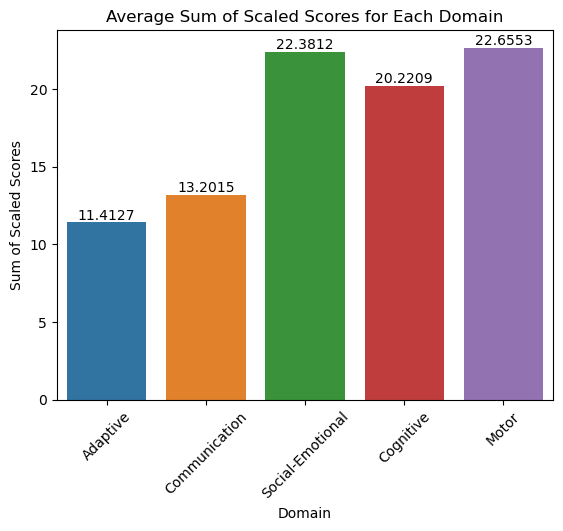

In [71]:
avg_ss = sns.barplot(x=domains,y=ss2)
plt.xlabel("Domain")
plt.ylabel("Sum of Scaled Scores")
plt.title("Average Sum of Scaled Scores for Each Domain")
plt.xticks(rotation=45)
avg_ss.bar_label(avg_ss.containers[0])
plt.savefig('../images/avg_ss_domains.png', format = 'png')

In [6]:
dataset['Adaptive Developmental Quotient'].mean()

87.43507925922125

In [19]:
dataset['Communication Developmental Quotient'].mean()

79.60449946068108

In [17]:
dataset['Social-Emotional Developmental Quotient'].mean()

94.47005081352974

In [21]:
dataset['Motor Developmental Quotient'].mean()

94.51122181706127

In [23]:
dataset['Cognitive Developmental Quotient'].mean()

89.06180380883939

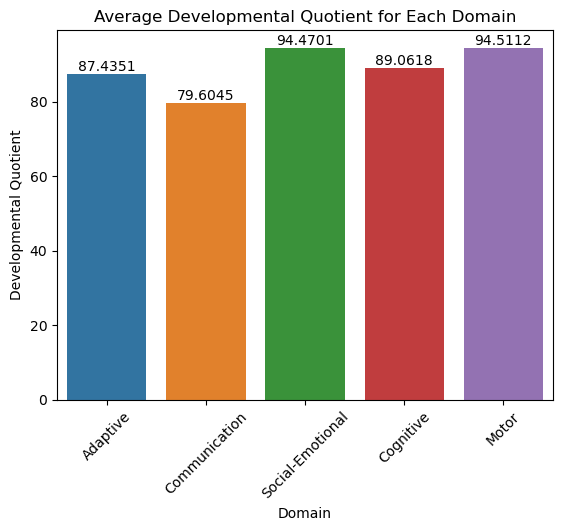

In [72]:
dq = [dataset['Adaptive Developmental Quotient'].mean(), dataset['Communication Developmental Quotient'].mean(), dataset['Social-Emotional Developmental Quotient'].mean(), dataset['Cognitive Developmental Quotient'].mean(), dataset['Motor Developmental Quotient'].mean()]

avg_dq = sns.barplot(x=domains,y=dq)
plt.xlabel("Domain")
plt.ylabel("Developmental Quotient")
plt.title("Average Developmental Quotient for Each Domain")
plt.xticks(rotation=45)
avg_dq.bar_label(avg_dq.containers[0])
plt.savefig('../images/avg_dq_domains.png', format = 'png')

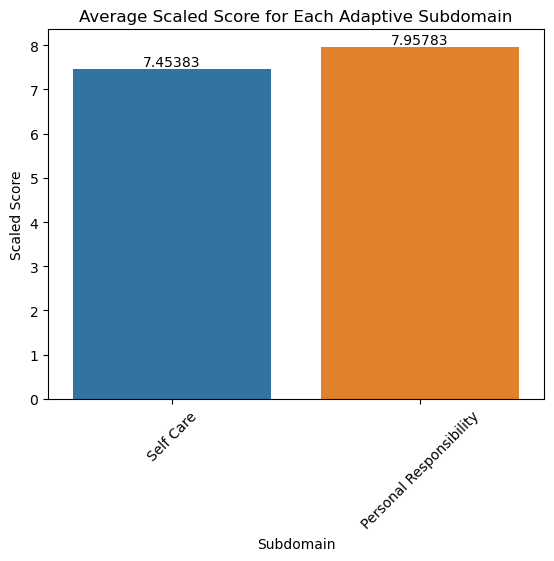

In [73]:
adaptive_subdomain_ss = [dataset['Adaptive-Self Care SS'].mean(), dataset['Adaptive-Personal Responsibility SS'].mean()]
adaptive_subdomain_ss_list = ['Self Care', 'Personal Responsibility']

adaptive_sd = sns.barplot(x=adaptive_subdomain_ss_list,y=adaptive_subdomain_ss)
plt.xlabel("Subdomain")
plt.ylabel("Scaled Score")
plt.title("Average Scaled Score for Each Adaptive Subdomain")
plt.xticks(rotation=45)
adaptive_sd.bar_label(adaptive_sd.containers[0])
plt.savefig('../images/avg_adaptive_ss_subdomains.png', format = 'png')

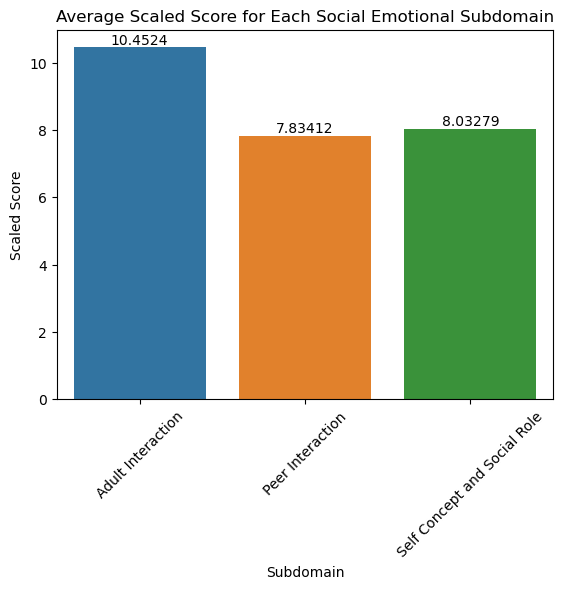

In [74]:
socialemotional_subdomain_ss = [dataset['Social Emotional-Adult Interaction SS'].mean(), dataset['Social Emotional-Peer Interaction SS'].mean(), dataset['Social Emotional-Self Concept / Social Role SS'].mean()]
adaptive_subdomain_ss_list = ['Adult Interaction', 'Peer Interaction', 'Self Concept and Social Role']

se_sd = sns.barplot(x=adaptive_subdomain_ss_list,y=socialemotional_subdomain_ss)
plt.xlabel("Subdomain")
plt.ylabel("Scaled Score")
plt.title("Average Scaled Score for Each Social Emotional Subdomain")
plt.xticks(rotation=45)
se_sd.bar_label(se_sd.containers[0])
plt.savefig('../images/avg_socialemotional_ss_subdomains.png', format = 'png')

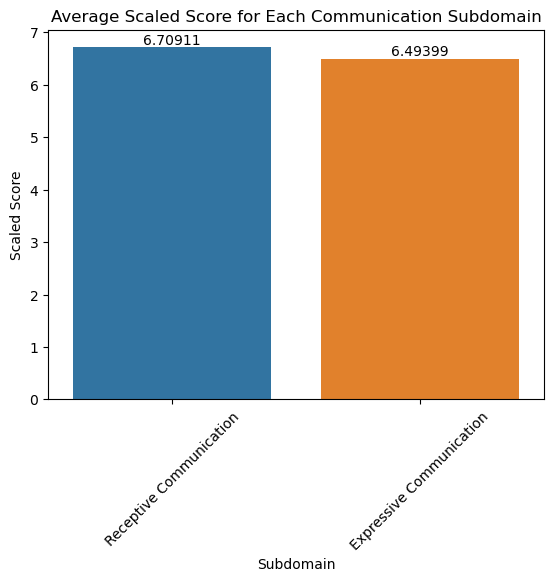

In [75]:
communication_subdomain_ss = [dataset['Communication-Receptive Communication SS'].mean(), dataset['Communication-Expressive Communication SS'].mean()]
adaptive_subdomain_ss_list = ['Receptive Communication', 'Expressive Communication']

comm_sd = sns.barplot(x=adaptive_subdomain_ss_list,y=communication_subdomain_ss)
plt.xlabel("Subdomain")
plt.ylabel("Scaled Score")
plt.title("Average Scaled Score for Each Communication Subdomain")
plt.xticks(rotation=45)
comm_sd.bar_label(comm_sd.containers[0])
plt.savefig('../images/avg_communication_ss_subdomains.png', format = 'png')

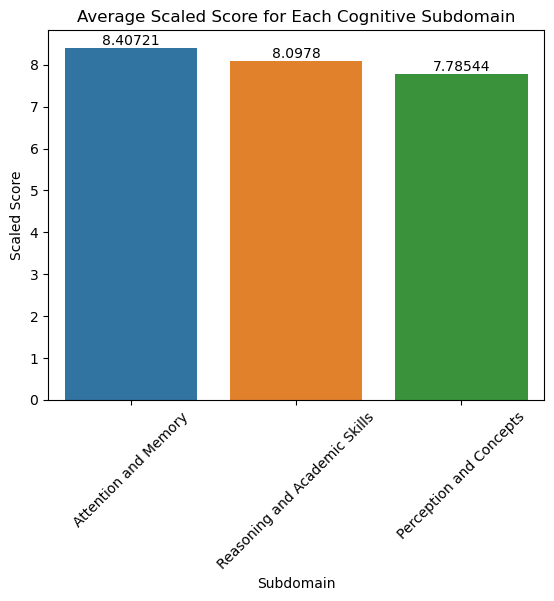

In [77]:
cognitive_subdomain_ss = [dataset['Cognitive-Attention and Memory SS'].mean(), dataset['Cognitive-Reasoning / Academic Skills SS'].mean(), dataset['Cognitive-Perception and Concepts SS'].mean()]
cognitive_subdomain_ss_list = ['Attention and Memory', 'Reasoning and Academic Skills', 'Perception and Concepts']

cog_sd = sns.barplot(x=cognitive_subdomain_ss_list,y=cognitive_subdomain_ss)
plt.xlabel("Subdomain")
plt.ylabel("Scaled Score")
plt.title("Average Scaled Score for Each Cognitive Subdomain")
plt.xticks(rotation=45)
cog_sd.bar_label(cog_sd.containers[0])
plt.savefig('../images/avg_cognitive_ss_subdomains.png', format = 'png')

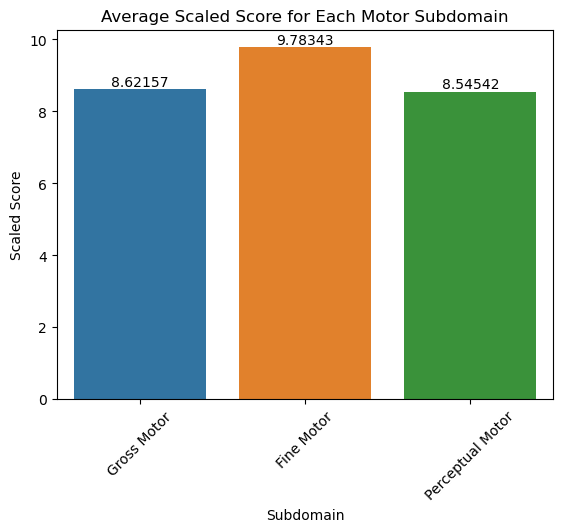

In [76]:
motor_subdomain_ss = [dataset['Motor-Gross Motor SS'].mean(), dataset['Motor-Fine Motor SS'].mean(), dataset['Motor-Perceptual Motor SS'].mean()]
motor_subdomain_ss_list = ['Gross Motor', 'Fine Motor', 'Perceptual Motor']

motor_sd = sns.barplot(x=motor_subdomain_ss_list,y=motor_subdomain_ss)
plt.xlabel("Subdomain")
plt.ylabel("Scaled Score")
plt.title("Average Scaled Score for Each Motor Subdomain")
plt.xticks(rotation=45)
motor_sd.bar_label(motor_sd.containers[0])
plt.savefig('../images/avg_motor_ss_subdomains.png', format = 'png')

In [41]:
dataset['age'] = dataset['Adaptive-Self Care Date of Testing'] - dataset['Date of Birth']

In [42]:
dataset.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10,age
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269 days
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,818 days
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,653 days
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353 days
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,477 days


In [70]:
dataset['Location - Sub Level 1'].unique()

array(['Southwest', 'Greater Nashville', 'First Tennessee',
       'Southeast Tennessee', 'Memphis Delta', 'Northwest',
       'Upper Cumberland', 'East Tennessee', 'South Central', nan],
      dtype=object)

In [68]:
dataset.groupby(dataset['Location - Sub Level 1']).size()

Location - Sub Level 1
East Tennessee         3340
First Tennessee        1701
Greater Nashville      3436
Memphis Delta          2717
Northwest               955
South Central          2560
Southeast Tennessee    1583
Southwest              1100
Upper Cumberland       2021
dtype: int64

7. Is there any notable pattern of scoring by region? Note: TEIS contracts with three agencies for evaluations (one per grand region) as follows:  
* East TN, First TN and Southeast
* Greater Nashville, Upper Cumberland, and South Central
* Northwest, Southwest, and Memphis Delta

In [92]:
location_groups = {
    'East Tennessee': 'East',
    'First Tennessee': 'East',
    'Southeast Tennessee': 'East',
    'Greater Nashville': 'Middle TN',
    'Upper Cumberland': 'Middle TN',
    'South Central': 'Middle TN',
    'Northwest': 'West',
    'Southwest': 'West',
    'Memphis Delta': 'West'
}


dataset['Location Group'] = dataset['Location - Sub Level 1'].map(location_groups)


dataset['Location Group'].fillna('Other', inplace=True)

In [89]:
check_columns = ['Adaptive Sum of Scaled Scores', 'Social-Emotional Sum of Scaled Scores', 'Communication Sum of Scaled Scores', 'Motor Sum of Scaled Scores', 'Cognitive Sum of Scaled Scores']

In [90]:
dataset.dropna(subset=check_columns, how='all', inplace=True)

In [94]:
dataset.columns = dataset.columns.str.replace(' ', '_')

dataset.columns = dataset.columns.str.replace('-', '_')

dataset.columns = dataset.columns.str.replace('__', '_')

In [96]:
dataset['Program_Label'].unique()

array(['BDI-3 Eligibility Evaluation', 'BDI-3 Annual Evaluation',
       'BDI-3 Milestone or Exit Evaluation'], dtype=object)

In [101]:
eligibility_eval = dataset[dataset['Program_Label']=='BDI-3 Eligibility Evaluation']

annual_eval = dataset[dataset['Program_Label']=='BDI-3 Annual Evaluation']

exit_eval = dataset[dataset['Program_Label']=='BDI-3 Milestone or Exit Evaluation']

[Text(0, 0, '10.9669'),
 Text(0, 0, '13.6887'),
 Text(0, 0, '21.4851'),
 Text(0, 0, '20.5164'),
 Text(0, 0, '22.4524')]

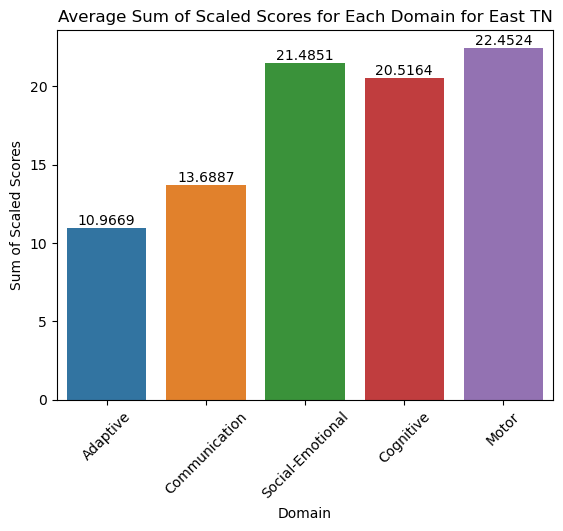

In [105]:
ss_avg_east = [dataset[dataset['Location_Group']=='East']['Adaptive_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='East']['Communication_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='East']['Social_Emotional_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='East']['Cognitive_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='East']['Motor_Sum_of_Scaled_Scores'].mean()]

ss_avg_east_barplot = sns.barplot(x=domains,y=ss_avg_east)
plt.xlabel("Domain")
plt.ylabel("Sum of Scaled Scores")
plt.title("Average Sum of Scaled Scores for Each Domain for East TN")
plt.xticks(rotation=45)
ss_avg_east_barplot.bar_label(ss_avg_east_barplot.containers[0])

[Text(0, 0, '11.6057'),
 Text(0, 0, '12.9901'),
 Text(0, 0, '23.6644'),
 Text(0, 0, '20.3275'),
 Text(0, 0, '23.2356')]

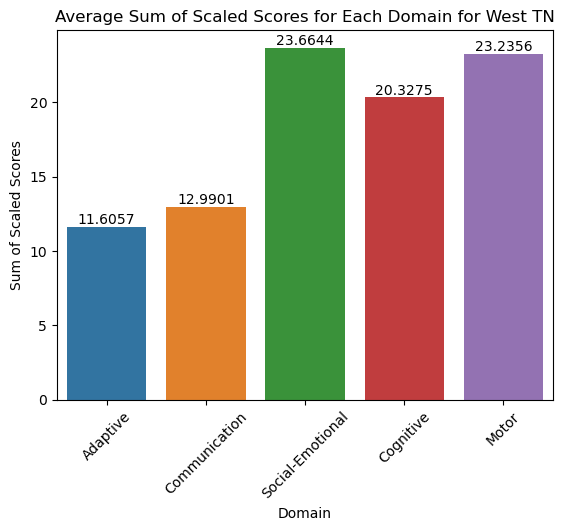

In [106]:
ss_avg_west = [dataset[dataset['Location_Group']=='West']['Adaptive_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='West']['Communication_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='West']['Social_Emotional_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='West']['Cognitive_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='West']['Motor_Sum_of_Scaled_Scores'].mean()]

ss_avg_west_barplot = sns.barplot(x=domains,y=ss_avg_west)
plt.xlabel("Domain")
plt.ylabel("Sum of Scaled Scores")
plt.title("Average Sum of Scaled Scores for Each Domain for West TN")
plt.xticks(rotation=45)
ss_avg_west_barplot.bar_label(ss_avg_west_barplot.containers[0])

[Text(0, 0, '11.6218'),
 Text(0, 0, '12.945'),
 Text(0, 0, '22.314'),
 Text(0, 0, '19.9244'),
 Text(0, 0, '22.4713')]

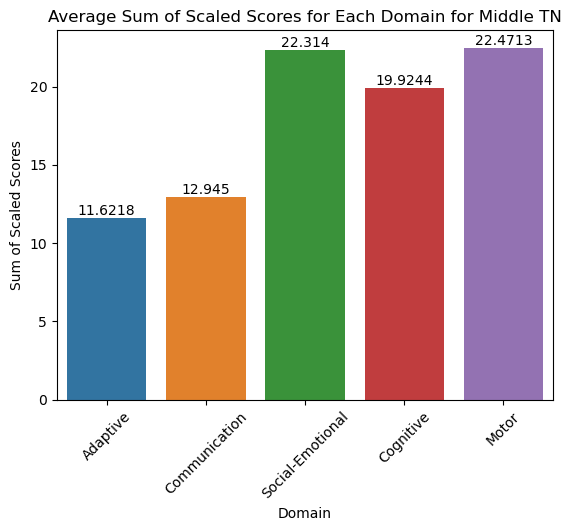

In [107]:
ss_avg_mid = [dataset[dataset['Location_Group']=='Middle TN']['Adaptive_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='Middle TN']['Communication_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='Middle TN']['Social_Emotional_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='Middle TN']['Cognitive_Sum_of_Scaled_Scores'].mean(), dataset[dataset['Location_Group']=='Middle TN']['Motor_Sum_of_Scaled_Scores'].mean()]

ss_avg_mid_barplot = sns.barplot(x=domains,y=ss_avg_mid)
plt.xlabel("Domain")
plt.ylabel("Sum of Scaled Scores")
plt.title("Average Sum of Scaled Scores for Each Domain for Middle TN")
plt.xticks(rotation=45)
ss_avg_mid_barplot.bar_label(ss_avg_mid_barplot.containers[0])